In [8]:
import cv2
img_cv = cv2.imread(imagepath)
a = img_cv.shape
labe = np.zeros((a[0],a[1])) # width * height 크기의 255 픽셀을 갖는 array 
print(len(labe), len(labe[1]))

2864 2289


In [9]:
for i in range(len(labe)):
    for k in range(len(labe[0])):
        labe[i][k] = 1
print(labe)



[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


In [10]:
from read_roi import read_roi_zip, read_roi_file
roi = read_roi_file('C:/Users/Administrator/Desktop\deep/png_path/116_A-P_2.roi')
name = '116_A-P_2'
print(roi)
left_top = roi[name]['left'], roi[name]['top'] # roi 점 구함
right_bottom = roi[name]['width'], roi[name]['height']
for i in range(left_top[1], left_top[1] + right_bottom[1]):
    for k in range(left_top[0],left_top[0] + right_bottom[0]):
        labe[i][k] = 255
        
cv2.imwrite(imagepath + 'blank' + '.png', labe)



{'116_A-P_2': {'type': 'rectangle', 'left': 1659, 'top': 1076, 'width': 169, 'height': 169, 'arc_size': 0, 'name': '116_A-P_2', 'position': 0}}


True

In [11]:
from radiomics import featureextractor
import six, numpy as np

In [12]:
import os
import SimpleITK as sitk
imagepath = 'C:/Users/Administrator/Desktop\deep/png_path/116_A-P.png'
labelpath = 'C:/Users/Administrator/Desktop\deep/png_path/116_A-P.pngblank.png' 
image = sitk.ReadImage(imagepath)
label = sitk.ReadImage(labelpath)
sitk.Show(image)

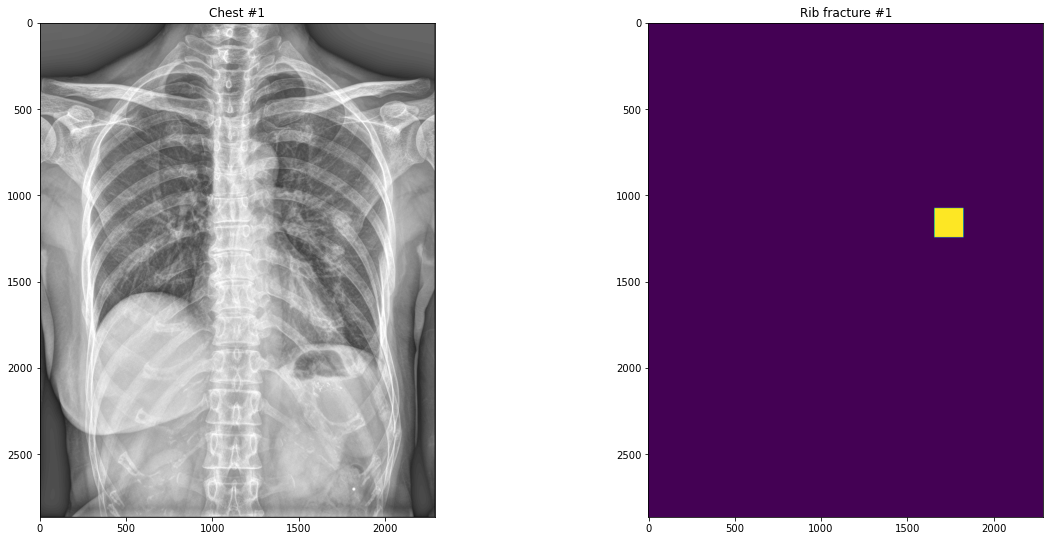

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))
# First image
plt.subplot(2,2,1)
plt.imshow(sitk.GetArrayFromImage(image), cmap="gray")
plt.title("Chest #1")
plt.subplot(2,2,2)
plt.imshow(sitk.GetArrayFromImage(label))        
plt.title("Rib fracture #1")
plt.show()

In [14]:
import os
# Instantiate the extractor

extractor = featureextractor.RadiomicsFeatureExtractor()
result_1 = extractor.execute(image, label)

INFO:radiomics.featureextractor:No valid config parameter, using defaults: {'minimumROIDimensions': 2, 'minimumROISize': None, 'normalize': False, 'normalizeScale': 1, 'removeOutliers': None, 'resampledPixelSpacing': None, 'interpolator': 'sitkBSpline', 'preCrop': False, 'padDistance': 5, 'distances': [1], 'force2D': False, 'force2Ddimension': 0, 'resegmentRange': None, 'label': 1, 'additionalInfo': True}
INFO:radiomics.featureextractor:Enabled image types: {'Original': {}}
INFO:radiomics.featureextractor:Enabled features: {'firstorder': [], 'glcm': [], 'gldm': [], 'glrlm': [], 'glszm': [], 'ngtdm': [], 'shape': []}
INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radi

In [15]:
feature = np.array([])

for key, value in six.iteritems(result_1):
    if key.startswith("original_"):
        feature = np.append ( feature, result_1[key])
print(result_1)

OrderedDict([('diagnostics_Versions_PyRadiomics', 'v3.0.post9.dev0+g51639ec'), ('diagnostics_Versions_Numpy', '1.19.0'), ('diagnostics_Versions_SimpleITK', '1.2.4'), ('diagnostics_Versions_PyWavelet', '1.0.0'), ('diagnostics_Versions_Python', '3.6.2'), ('diagnostics_Configuration_Settings', {'minimumROIDimensions': 2, 'minimumROISize': None, 'normalize': False, 'normalizeScale': 1, 'removeOutliers': None, 'resampledPixelSpacing': None, 'interpolator': 'sitkBSpline', 'preCrop': False, 'padDistance': 5, 'distances': [1], 'force2D': False, 'force2Ddimension': 0, 'resegmentRange': None, 'label': 1, 'additionalInfo': True}), ('diagnostics_Configuration_EnabledImageTypes', {'Original': {}}), ('diagnostics_Image-original_Hash', 'b4627d700caa73adcfe07bf94301b5f10a635dee'), ('diagnostics_Image-original_Dimensionality', '2D'), ('diagnostics_Image-original_Spacing', (1.0, 1.0)), ('diagnostics_Image-original_Size', (2289, 2864)), ('diagnostics_Image-original_Mean', 155.20342798079716), ('diagnosti

Text(0.5, 1.0, 'Features from brain #1')

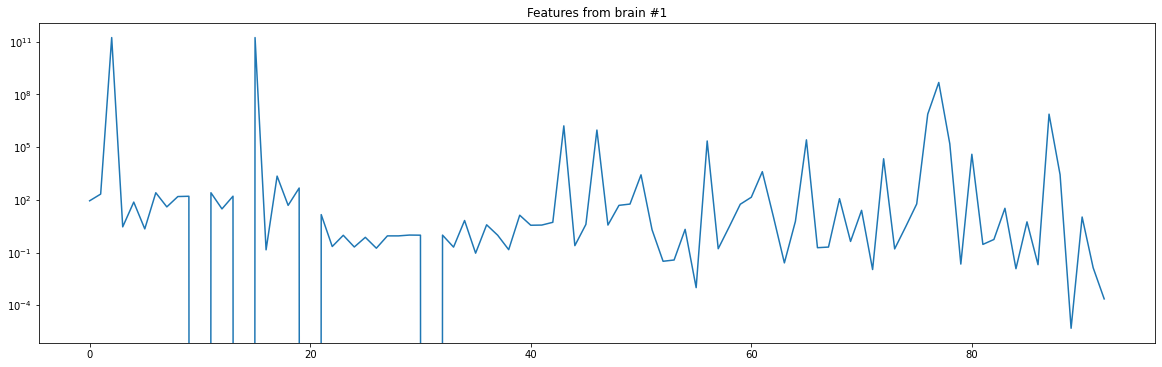

In [16]:
plt.figure(figsize=(20,20))
plt.subplot(3,1,1)
plt.plot(feature)
plt.yscale('log')
plt.title ( "Features from brain #1")

In [17]:
print('Result type:', type(result_1))  # result is returned in a Python ordered dictionary)
print('')
print('Calculated features')
indexF = []
columnF = [1]
valueF  = []
for key, value in six.iteritems(result_1):
    print('\t', key, ':', value)
    indexF.append(key)
    valueF.append(value)
print(indexF)
print(valueF)

Result type: <class 'collections.OrderedDict'>

Calculated features
	 diagnostics_Versions_PyRadiomics : v3.0.post9.dev0+g51639ec
	 diagnostics_Versions_Numpy : 1.19.0
	 diagnostics_Versions_SimpleITK : 1.2.4
	 diagnostics_Versions_PyWavelet : 1.0.0
	 diagnostics_Versions_Python : 3.6.2
	 diagnostics_Configuration_Settings : {'minimumROIDimensions': 2, 'minimumROISize': None, 'normalize': False, 'normalizeScale': 1, 'removeOutliers': None, 'resampledPixelSpacing': None, 'interpolator': 'sitkBSpline', 'preCrop': False, 'padDistance': 5, 'distances': [1], 'force2D': False, 'force2Ddimension': 0, 'resegmentRange': None, 'label': 1, 'additionalInfo': True}
	 diagnostics_Configuration_EnabledImageTypes : {'Original': {}}
	 diagnostics_Image-original_Hash : b4627d700caa73adcfe07bf94301b5f10a635dee
	 diagnostics_Image-original_Dimensionality : 2D
	 diagnostics_Image-original_Spacing : (1.0, 1.0)
	 diagnostics_Image-original_Size : (2289, 2864)
	 diagnostics_Image-original_Mean : 155.203427980

In [18]:
import pandas as pd
values = pd.DataFrame(index=indexF, columns = columnF)
for i in range(values.shape[0]):
    try: values.iloc[i] = valueF[i]
    except: values.iloc[i] = str(valueF[i])
values.to_excel('./test.xlsx',
                sheet_name='Sheet1',
                columns=columnF,
                header=True,
                index=indexF,
                startrow=1,
                startcol=0,
                engine=None,
                merge_cells=True,
                encoding=None,
                inf_rep='inf',
                verbose=True,
                freeze_panes=None)
